Objective

To perform predictive analysis using machine learning model to predict defaulter and non-defaulter by analyzing historical data of borrowers

Background

It is crucial for lenders to assess the creditworthiness of borrowers before granting them loans or credits, identifying potential defaulters who are at higher risk of failing to repay their debts and help mitigate financial losses and maintain a lending portfolio

Scope

The project is done on Bajaj Finserv's borrowers

Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [40]:
Data = pd.read_csv("Loan_PaymentDefault1.csv")

In [41]:
Data

,Customer_id,Loan_id,Loan_type,Loan_amount,Interest_rate,Loan_term,Employment_type,Income_level,Credit_score,Gender,Marital_status,Education_level,Application_date,Approval_date,Disbursement_date,Due_date,Default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05/04/2018,23/04/2018,24/04/2018,14/08/2018,F
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30/12/2022,31/12/2022,12/01/2023,05/04/2023,F
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15/11/2019,18/11/2019,27/11/2019,24/02/2020,F
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25/08/2021,08/09/2021,11/09/2021,25/02/2022,F
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02/09/2020,07/09/2020,11/09/2020,29/12/2020,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST-00002992,LN00001103,Car Loan,37945,0.070087,57,Self-employed,High,511,Male,Married,PhD,23/01/2022,11/02/2022,14/02/2022,13/06/2022,F
4996,CUST-00004094,LN00001068,Personal Loan,48937,0.056405,50,Part-time,Medium,502,Male,Single,PhD,12/05/2018,17/05/2018,27/05/2018,20/11/2018,F
4997,CUST-00003903,LN00000745,Home Loan,7476,0.064212,58,Full-time,High,452,Female,Single,High School,14/10/2022,29/10/2022,06/11/2022,08/04/2023,T
4998,CUST-00002276,LN00003075,Car Loan,52756,0.094914,12,Self-employed,Medium,728,Male,Married,PhD,21/07/2018,06/08/2018,20/08/2018,21/01/2019,F


In [42]:
Data.head()

,Customer_id,Loan_id,Loan_type,Loan_amount,Interest_rate,Loan_term,Employment_type,Income_level,Credit_score,Gender,Marital_status,Education_level,Application_date,Approval_date,Disbursement_date,Due_date,Default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05/04/2018,23/04/2018,24/04/2018,14/08/2018,F
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30/12/2022,31/12/2022,12/01/2023,05/04/2023,F
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15/11/2019,18/11/2019,27/11/2019,24/02/2020,F
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25/08/2021,08/09/2021,11/09/2021,25/02/2022,F
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02/09/2020,07/09/2020,11/09/2020,29/12/2020,F


EDA (Exploratory Data Analysis)

In [44]:
Data.shape

(5000, 17)

In [45]:
list(Data)

['Customer_id',
 'Loan_id',
 'Loan_type',
 'Loan_amount',
 'Interest_rate',
 'Loan_term',
 'Employment_type',
 'Income_level',
 'Credit_score',
 'Gender',
 'Marital_status',
 'Education_level',
 'Application_date',
 'Approval_date',
 'Disbursement_date',
 'Due_date',
 'Default_status']

In [46]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_id        5000 non-null   object 
 1   Loan_id            5000 non-null   object 
 2   Loan_type          5000 non-null   object 
 3   Loan_amount        5000 non-null   int64  
 4   Interest_rate      5000 non-null   float64
 5   Loan_term          5000 non-null   int64  
 6   Employment_type    5000 non-null   object 
 7   Income_level       5000 non-null   object 
 8   Credit_score       5000 non-null   int64  
 9   Gender             5000 non-null   object 
 10  Marital_status     5000 non-null   object 
 11  Education_level    5000 non-null   object 
 12  Application_date   5000 non-null   object 
 13  Approval_date      5000 non-null   object 
 14  Disbursement_date  5000 non-null   object 
 15  Due_date           5000 non-null   object 
 16  Default_status     5000 

Check for Missing Values

In [52]:
Data.isnull().sum()

Customer_id          0
Loan_id              0
Loan_type            0
Loan_amount          0
Interest_rate        0
Loan_term            0
Employment_type      0
Income_level         0
Credit_score         0
Gender               0
Marital_status       0
Education_level      0
Application_date     0
Approval_date        0
Disbursement_date    0
Due_date             0
Default_status       0
dtype: int64

Analyses and Visualizations

<Axes: xlabel='Income_level', ylabel='count'>

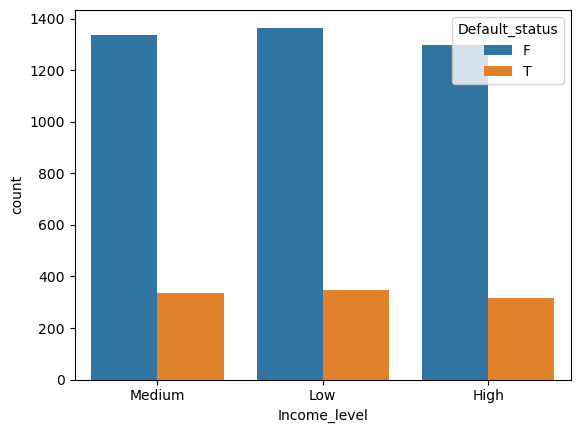

In [56]:
sns.countplot(x='Income_level',hue='Default_status', data=Data)

<Axes: xlabel='Marital_status', ylabel='count'>

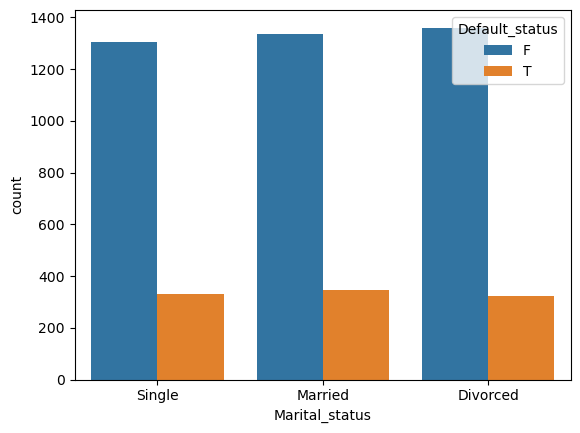

In [58]:
sns.countplot(x='Marital_status',hue='Default_status', data=Data)

<Axes: xlabel='Education_level', ylabel='count'>

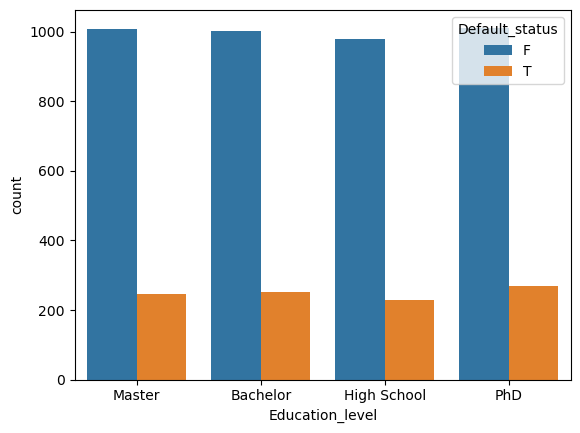

In [60]:
sns.countplot(x='Education_level',hue='Default_status', data=Data)

<Axes: xlabel='Gender', ylabel='count'>

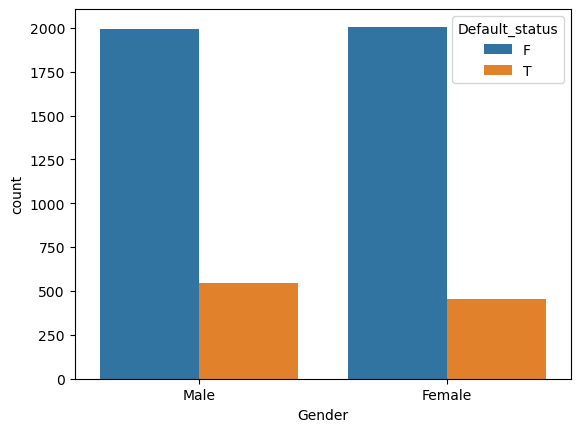

In [61]:
sns.countplot(x='Gender',hue='Default_status', data=Data)

<Axes: xlabel='Employment_type', ylabel='Default_status'>

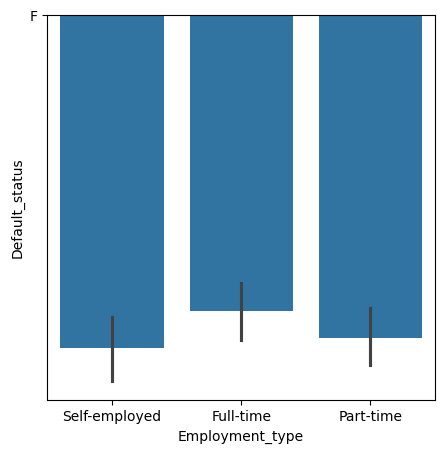

In [62]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x="Employment_type", y='Default_status', data=Data)

<Axes: xlabel='Education_level', ylabel='Default_status'>

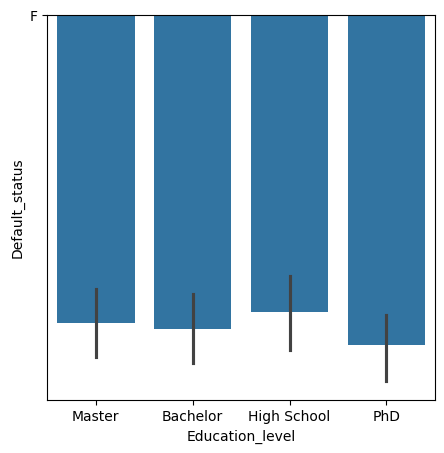

In [63]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Education_level', y='Default_status', data=Data)

Modelling (Data Transformation)

In [66]:
Data.replace({'Loan_type':{'Car Loan':0,'Education Loan':1,'Home Loan':2,'Personal Loan':3},
              'Employment_type':{'Full-time':0,'Part-time':1,'Self-employed':2},'Income_level':{'Low':0,'Medium':1,'High':2},
              'Gender':{'Male':0,'Female':1},'Marital_status':{'Single':0,'Divorced':1,'Married':2},
              'Education_level':{'High School':0,'Bachelor':1,'Master':2,'PhD':3},
              'Default':{'F':0,'T':1}}, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_10552\1780458376.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data.replace({'Loan_type':{'Car Loan':0,'Education Loan':1,'Home Loan':2,'Personal Loan':3},


In [68]:
Data

,Customer_id,Loan_id,Loan_type,Loan_amount,Interest_rate,Loan_term,Employment_type,Income_level,Credit_score,Gender,Marital_status,Education_level,Application_date,Approval_date,Disbursement_date,Due_date,Default_status
0,CUST-00004912,LN00004170,0,16795,0.051852,15,2,1,833,0,0,2,05/04/2018,23/04/2018,24/04/2018,14/08/2018,F
1,CUST-00004194,LN00002413,3,1860,0.089296,56,0,1,776,1,2,1,30/12/2022,31/12/2022,12/01/2023,05/04/2023,F
2,CUST-00003610,LN00000024,3,77820,0.070470,51,0,0,697,0,1,0,15/11/2019,18/11/2019,27/11/2019,24/02/2020,F
3,CUST-00001895,LN00001742,0,55886,0.062155,30,0,0,795,1,2,3,25/08/2021,08/09/2021,11/09/2021,25/02/2022,F
4,CUST-00003782,LN00003161,2,7265,0.070635,48,1,0,519,1,2,0,02/09/2020,07/09/2020,11/09/2020,29/12/2020,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST-00002992,LN00001103,0,37945,0.070087,57,2,2,511,0,2,3,23/01/2022,11/02/2022,14/02/2022,13/06/2022,F
4996,CUST-00004094,LN00001068,3,48937,0.056405,50,1,1,502,0,0,3,12/05/2018,17/05/2018,27/05/2018,20/11/2018,F
4997,CUST-00003903,LN00000745,2,7476,0.064212,58,0,2,452,1,0,0,14/10/2022,29/10/2022,06/11/2022,08/04/2023,T
4998,CUST-00002276,LN00003075,0,52756,0.094914,12,2,1,728,0,2,3,21/07/2018,06/08/2018,20/08/2018,21/01/2019,F


Modelling (Splitting the dataset into independent (x) and dependent variables (y))

In [70]:
x = Data.iloc[:,[2,3,4,5,6,7,8,9,10,11]].values
y = Data.iloc[:,16].values

In [72]:
x

array([[0.0000000e+00, 1.6795000e+04, 5.1851709e-02, ..., 0.0000000e+00,
        0.0000000e+00, 2.0000000e+00],
       [3.0000000e+00, 1.8600000e+03, 8.9295672e-02, ..., 1.0000000e+00,
        2.0000000e+00, 1.0000000e+00],
       [3.0000000e+00, 7.7820000e+04, 7.0469564e-02, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [2.0000000e+00, 7.4760000e+03, 6.4211792e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.2756000e+04, 9.4914482e-02, ..., 0.0000000e+00,
        2.0000000e+00, 3.0000000e+00],
       [3.0000000e+00, 9.1101000e+04, 8.3820967e-02, ..., 0.0000000e+00,
        0.0000000e+00, 2.0000000e+00]])

In [73]:
y

array(['F', 'F', 'F', ..., 'T', 'F', 'F'], dtype=object)

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state =0)

In [76]:
x.shape,x_train.shape,x_test.shape

((5000, 10), (4000, 10), (1000, 10))

In [77]:
from sklearn.preprocessing import StandardScaler
Standard=StandardScaler()
x_train= Standard.fit_transform(x_train)
x_test= Standard.transform(x_test)

In [79]:
pd.crosstab(y,y)
pd.crosstab(y_train,y_train)
pd.crosstab(y_test,y_test)

col_0,F,T
row_0,,
F,820,0
T,0,180


Modelling (LogisticRegression Deployment)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
classifier =LogisticRegression(random_state =0)

In [85]:
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

Performance Parameters

In [88]:
y_pred= classifier.predict(x_test)
y_pred1= classifier.predict(x_train)

In [90]:
print(confusion_matrix(y_test,y_pred))
print('Test accuracy score ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_train,y_pred1))
print('Train accuracy score ',accuracy_score(y_train,y_pred1))
print(classification_report(y_train,y_pred1))
    

[[820   0]
 [180   0]]
Test accuracy score  0.82


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\s

              precision    recall  f1-score   support

           F       0.82      1.00      0.90       820
           T       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[3181    0]
 [ 819    0]]
Train accuracy score  0.79525
              precision    recall  f1-score   support

           F       0.80      1.00      0.89      3181
           T       0.00      0.00      0.00       819

    accuracy                           0.80      4000
   macro avg       0.40      0.50      0.44      4000
weighted avg       0.63      0.80      0.70      4000



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Modelling (SVM Deployment)

In [93]:
from sklearn.svm import SVC

In [95]:
classifier = SVC(kernel='linear', random_state =0)

In [97]:
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

Peformance Parameters

In [100]:
y_pred= classifier.predict(x_test)
y_pred1= classifier.predict(x_train)

In [103]:
print(confusion_matrix(y_test,y_pred))
print('Test accuracy score ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_train,y_pred1))
print('Train accuracy score ',accuracy_score(y_train,y_pred1))
print(classification_report(y_train,y_pred1))
    

[[820   0]
 [180   0]]
Test accuracy score  0.82
              precision    recall  f1-score   support

           F       0.82      1.00      0.90       820
           T       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[3181    0]
 [ 819    0]]
Train accuracy score  0.79525


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\s

              precision    recall  f1-score   support

           F       0.80      1.00      0.89      3181
           T       0.00      0.00      0.00       819

    accuracy                           0.80      4000
   macro avg       0.40      0.50      0.44      4000
weighted avg       0.63      0.80      0.70      4000



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Modelling (DecisionTree Deployment)

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
classifier = DecisionTreeClassifier(criterion= "entropy", random_state= 2)

In [110]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

Performance Parameters

In [113]:
y_pred= classifier.predict(x_test)
y_pred1= classifier.predict(x_train)

In [114]:
print(confusion_matrix(y_test,y_pred))
print('Test accuracy score ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_train,y_pred1))
print('Train accuracy score ',accuracy_score(y_train,y_pred1))
print(classification_report(y_train,y_pred1))
    

[[638 182]
 [148  32]]
Test accuracy score  0.67
              precision    recall  f1-score   support

           F       0.81      0.78      0.79       820
           T       0.15      0.18      0.16       180

    accuracy                           0.67      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.69      0.67      0.68      1000

[[3181    0]
 [   0  819]]
Train accuracy score  1.0
              precision    recall  f1-score   support

           F       1.00      1.00      1.00      3181
           T       1.00      1.00      1.00       819

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



Modelling (AdaBoost Deployment)

In [117]:
from sklearn.ensemble import AdaBoostClassifier

In [118]:
classifier=AdaBoostClassifier(n_estimators=500, learning_rate=1)

In [120]:
classifier.fit(x_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, n_estimators=500)

Performance Parameters

In [124]:
y_pred= classifier.predict(x_test)
y_pred1= classifier.predict(x_train)

In [125]:
print(confusion_matrix(y_test,y_pred))
print('Test accuracy score ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_train,y_pred1))
print('Train accuracy score ',accuracy_score(y_train,y_pred1))
print(classification_report(y_train,y_pred1))
    

[[813   7]
 [177   3]]
Test accuracy score  0.816
              precision    recall  f1-score   support

           F       0.82      0.99      0.90       820
           T       0.30      0.02      0.03       180

    accuracy                           0.82      1000
   macro avg       0.56      0.50      0.46      1000
weighted avg       0.73      0.82      0.74      1000

[[3173    8]
 [ 796   23]]
Train accuracy score  0.799
              precision    recall  f1-score   support

           F       0.80      1.00      0.89      3181
           T       0.74      0.03      0.05       819

    accuracy                           0.80      4000
   macro avg       0.77      0.51      0.47      4000
weighted avg       0.79      0.80      0.72      4000



Modelling (KNeighbors Deployment)

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
classifier=KNeighborsClassifier(n_neighbors =6, metric ='minkowski',p=2)

In [130]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

Performance Parameters

In [133]:
y_pred= classifier.predict(x_test)
y_pred1= classifier.predict(x_train)

In [134]:
print(confusion_matrix(y_test,y_pred))
print('Test accuracy score ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_train,y_pred1))
print('Train accuracy score ',accuracy_score(y_train,y_pred1))
print(classification_report(y_train,y_pred1))
    

[[809  11]
 [177   3]]
Test accuracy score  0.812
              precision    recall  f1-score   support

           F       0.82      0.99      0.90       820
           T       0.21      0.02      0.03       180

    accuracy                           0.81      1000
   macro avg       0.52      0.50      0.46      1000
weighted avg       0.71      0.81      0.74      1000

[[3160   21]
 [ 768   51]]
Train accuracy score  0.80275
              precision    recall  f1-score   support

           F       0.80      0.99      0.89      3181
           T       0.71      0.06      0.11       819

    accuracy                           0.80      4000
   macro avg       0.76      0.53      0.50      4000
weighted avg       0.78      0.80      0.73      4000



Summary and Conclusion

Not all models provided good fit and performance. Model like DecisionTree did perform very low.

Adaboost, LogisticRegression, SVM, and KNN performed well and can be used to analyze the creditworthiness of borrowers before granting them loans or credit